In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.shape

(15000, 10)

In [4]:
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [5]:
df = df.drop(columns="PatientID")

In [6]:
df.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pregnancies             15000 non-null  int64  
 1   PlasmaGlucose           15000 non-null  int64  
 2   DiastolicBloodPressure  15000 non-null  int64  
 3   TricepsThickness        15000 non-null  int64  
 4   SerumInsulin            15000 non-null  int64  
 5   BMI                     15000 non-null  float64
 6   DiabetesPedigree        15000 non-null  float64
 7   Age                     15000 non-null  int64  
 8   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.0 MB


In [8]:
df.isna().sum()

Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

<AxesSubplot:xlabel='Diabetic', ylabel='count'>

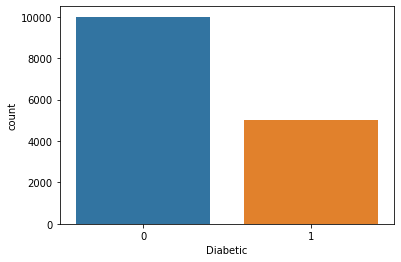

In [9]:
sns.countplot(data=df, x="Diabetic")

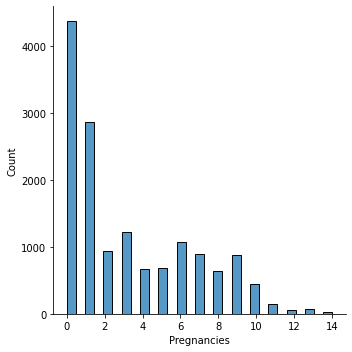

In [10]:
sns.displot(data=df, x="Pregnancies")

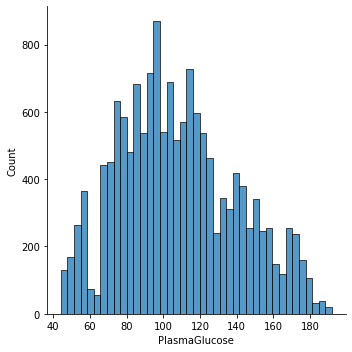

In [11]:
sns.displot(data=df, x="PlasmaGlucose")

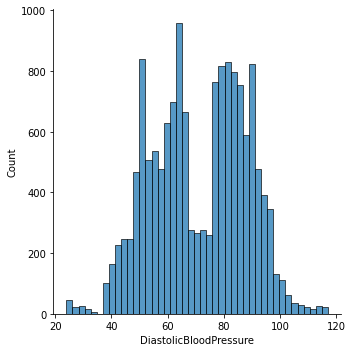

In [12]:
sns.displot(data=df, x="DiastolicBloodPressure")

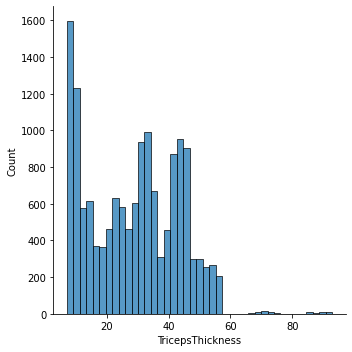

In [13]:
sns.displot(data=df, x="TricepsThickness")

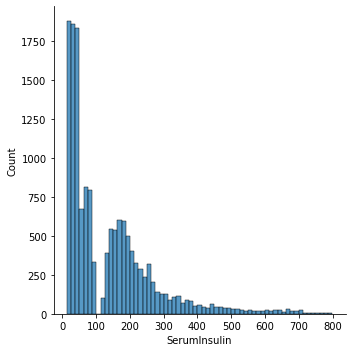

In [14]:
sns.displot(data=df, x="SerumInsulin")

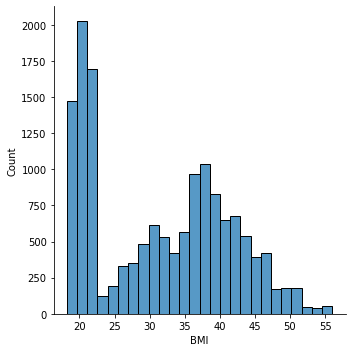

In [15]:
sns.displot(data=df, x="BMI")

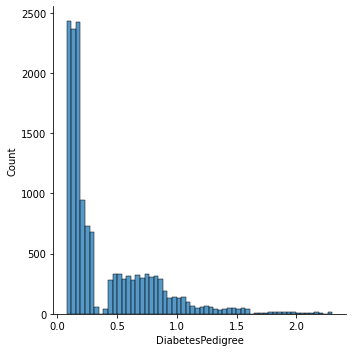

In [16]:
sns.displot(data=df, x="DiabetesPedigree")

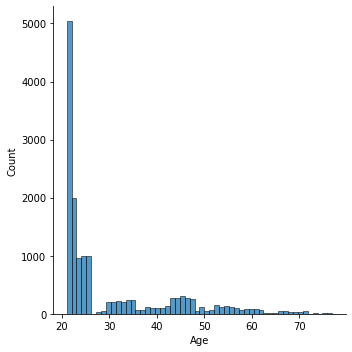

In [17]:
sns.displot(data=df, x="Age")

<AxesSubplot:xlabel='Diabetic', ylabel='DiabetesPedigree'>

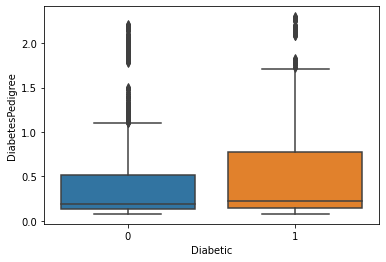

In [18]:
sns.boxplot(data=df, x="Diabetic", y="DiabetesPedigree")

<AxesSubplot:xlabel='Diabetic', ylabel='PlasmaGlucose'>

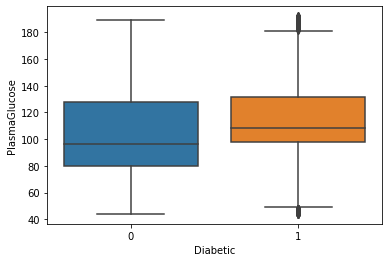

In [19]:
sns.boxplot(data=df, x="Diabetic", y="PlasmaGlucose")

<AxesSubplot:xlabel='Diabetic', ylabel='BMI'>

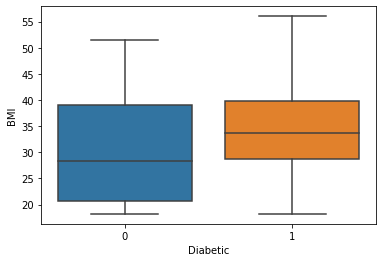

In [20]:
sns.boxplot(data=df, x="Diabetic", y="BMI")

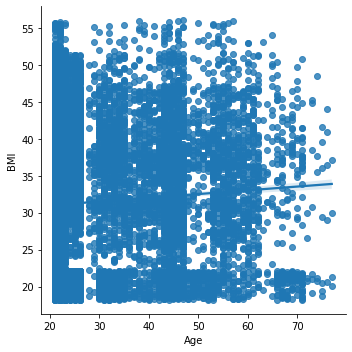

In [21]:
sns.lmplot(data=df, x="Age", y="BMI")

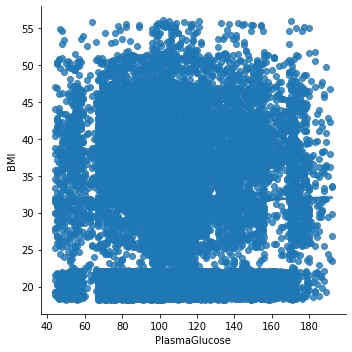

In [22]:
sns.lmplot(data=df, x="PlasmaGlucose", y="BMI")

<AxesSubplot:xlabel='Diabetic', ylabel='SerumInsulin'>

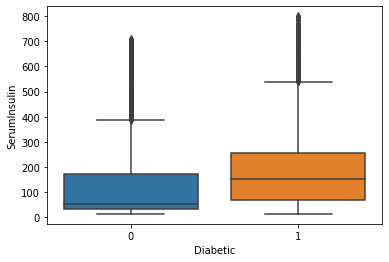

In [23]:
sns.boxplot(data=df, x="Diabetic", y="SerumInsulin")

<AxesSubplot:>

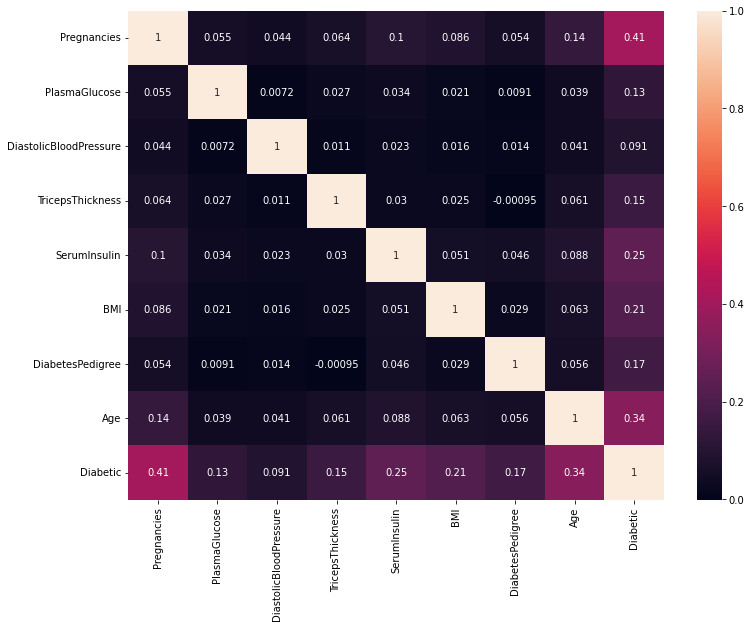

In [24]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='Diabetic', ylabel='Pregnancies'>

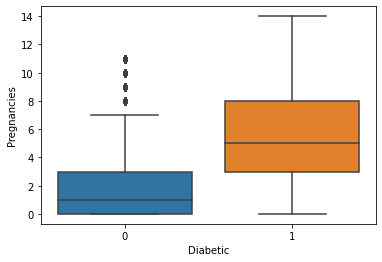

In [25]:
sns.boxplot(data=df, x="Diabetic", y="Pregnancies")

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [27]:
label = "Diabetic"
features = df.drop(columns=label).columns

In [28]:
x, y = df[features], df[label]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [38]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier

In [39]:
pipe = make_pipeline(StandardScaler(), VotingClassifier(estimators=[("gb", GradientBoostingClassifier()),
                                                                    ("ada", AdaBoostClassifier()),
                                                                   ("rf", RandomForestClassifier())]))

In [40]:
model = pipe.fit(x_train, y_train)

In [41]:
predictions = model.predict(x_test)

In [42]:
confusion_matrix(y_test, predictions)

array([[2839,  101],
       [ 120, 1440]], dtype=int64)

In [43]:
print("Precision: ", (precision_score(y_test, predictions) * 100), "%")
print("Recall: ", (recall_score(y_test, predictions) * 100), "%")

Precision:  93.44581440622972 %
Recall:  92.3076923076923 %
